In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.ensemble import *

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

import xgboost


from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA


from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''
sns.set_style("white")

<br>

# Data Import 

In [3]:
train_df_raw = pd.read_csv('Project2_Train.csv')
display(train_df_raw.head())

test_df_raw = pd.read_csv('Project2_Test.csv')
display(test_df_raw.head())

,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,VehicleDamage,Premium,Vintage,Response,Mystery
0,1,319654,Male,22,46,< 1 Year,Yes,29719,79,0,M3
1,2,298528,Female,40,28,1-2 Year,Yes,29645,99,0,M20
2,3,120858,Male,25,28,1-2 Year,Yes,35996,266,1,M3
3,4,234326,Female,25,29,< 1 Year,No,56899,25,0,M20
4,5,372307,Female,70,28,1-2 Year,No,47452,189,0,M17


,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,Damage,Premium,Vintage,Response,Mystery
0,1,121588,Female,24,28,< 1 Year,Yes,2630,271,0,M1
1,2,44234,Male,23,28,1-2 Year,Yes,40523,244,0,M20
2,3,65903,Male,51,28,1-2 Year,Yes,40951,33,0,M7
3,4,264705,Female,31,46,< 1 Year,Yes,42505,191,0,M9
4,5,364309,Male,51,46,1-2 Year,Yes,38232,151,1,M2


In [4]:
train_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  int64 
 1   id             10000 non-null  int64 
 2   Gender         10000 non-null  object
 3   Age            10000 non-null  int64 
 4   Region_Code    10000 non-null  int64 
 5   Age.1          10000 non-null  object
 6   VehicleDamage  10000 non-null  object
 7   Premium        10000 non-null  int64 
 8   Vintage        10000 non-null  int64 
 9   Response       10000 non-null  int64 
 10  Mystery        10000 non-null  object
dtypes: int64(7), object(4)
memory usage: 859.5+ KB


In [5]:
train_df = train_df_raw.copy()

# Make male = 1 female = 0 
train_df['Gender'] = train_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train_df['VehicleDamage'] = train_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train_df = pd.get_dummies(train_df, columns=['Age.1'])
train_df = pd.get_dummies(train_df, columns=['Region_Code'])


# Drop mystery 
train_df = train_df.drop('Mystery', axis=1)
train_df = train_df.drop('Unnamed: 0', axis=1)

train_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,319654,1,22,1,29719,79,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,298528,0,40,1,29645,99,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,120858,1,25,1,35996,266,1,1,0,0,0,0,0,0,1,0,0,0,0,0
3,234326,0,25,0,56899,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,372307,0,70,0,47452,189,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,0,1,0,0,0,0,0,0,0,0,1,0,0
9996,366284,1,43,1,28945,66,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9997,369037,0,46,0,2630,286,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [6]:
test_df = test_df_raw.copy()

# Make male = 1 female = 0 
test_df['Gender'] = test_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
test_df['Damage'] = test_df['Damage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
test_df = pd.get_dummies(test_df, columns=['Age.1'])
test_df = pd.get_dummies(test_df, columns=['Region_Code'])

# Drop mystery 
test_df = test_df.drop('Mystery', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

test_df = test_df.rename({'Damage': 'VehicleDamage'}, axis=1)

test_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,121588,0,24,1,2630,271,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,44234,1,23,1,40523,244,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,65903,1,51,1,40951,33,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,264705,0,31,1,42505,191,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,364309,1,51,1,38232,151,1,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,123293,1,49,0,33720,161,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9996,110877,1,43,1,23176,171,1,1,0,0,0,0,0,0,0,0,0,0,1,0
9997,207348,1,36,0,2630,16,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9998,89084,1,36,1,26275,230,0,1,0,0,0,0,0,0,0,0,0,0,1,0


<br>

# Data Exploration 

<AxesSubplot:xlabel='Gender', ylabel='count'>

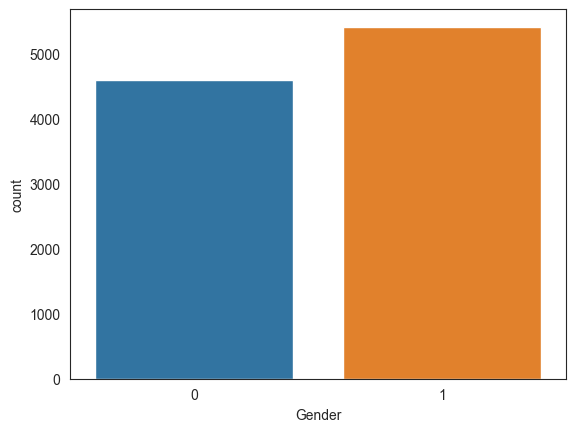

In [7]:
sns.countplot(data=train_df, x='Gender')

<AxesSubplot:xlabel='Response', ylabel='count'>

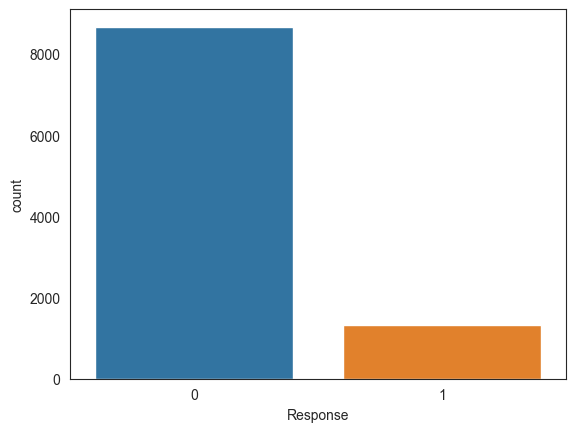

In [8]:
sns.countplot(data=train_df, x='Response')

In [9]:
'''
temp = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response']

sns.pairplot(data=train_df.loc[:,temp])
'''

"\ntemp = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response']\n\nsns.pairplot(data=train_df.loc[:,temp])\n"

<br>

# Functions

We are goign to use the threshold value from the benefit strucutre, which will be discussed later 

In [10]:
THRESHOLD = .1

In [11]:
def data_generation(df, features, target):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    y = df_temp[target]
    X = df_temp.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    return([X_train, X_test, y_train, y_test])


#--------------------------------------------------------------------------------------------------


def classification_stats(X_train, y_train, X_test, y_test, model_used, model_name):
    
    y_pred = (model_used.predict_proba(X_test)[:,1]>=THRESHOLD).astype(int)

    print("The Training Accuracy is: ", model_used.score(X_train, y_train))
    print("The Testing Accuracy is: ", model_used.score(X_test, y_test))
    print(classification_report(y_test, y_pred, target_names=['Bad Response', 'Good Response']))

    #--------------------------------------------------------------------------------------------------
    
    y_pred_proba = model_used.predict_proba(X_test)[:,1]
    y_pred = (y_pred_proba > THRESHOLD).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=model_used.classes_)
    
    fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
    fig.set_xlabel('Predicted labels')
    fig.set_ylabel('True labels')
    fig.set_title('Confusion Matrix when Threshold = ' + str(THRESHOLD*100) + '%')
    fig.set_ylim([0,2])

    plt.savefig('temp.png', transparent=True, dpi=600)
    plt.show()

    #--------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(16,9))
    fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

    #--------------------------------------------------------------------------------------------------
    # Test performance
    y_pred = model_used.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    auc = roc_auc_score(y_test, y_pred)
    fig = sns.lineplot(x=fpr, y=tpr, label=f'Validation AUC: {round(auc,3)}', ci=None, color='#edb021')

    #--------------------------------------------------------------------------------------------------
    # Train performance
    y_pred = model_used.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)

    auc = roc_auc_score(y_train, y_pred)
    fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')

    #--------------------------------------------------------------------------------------------------
    plt.legend()
    fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    plt.suptitle(model_name, fontsize = 24)
    plt.savefig('temp.png', transparent=True)
    plt.show() 
    

#--------------------------------------------------------------------------------------------------

def PRAUC_generator(X_train, y_train, X_test, y_test, model_used, model_name):
    # Training Set
    y_pred_proba = model_used.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    average_precision = average_precision_score(y_test, y_pred_proba)

    plt.figure(figsize = (8,6))
    sns.lineplot(x=recall, y=precision,
                 label = 'PRAUC: %0.3f' % average_precision, color='#edb021')
    baseline = len(y_test[y_test==1]) / len(y_test)
    sns.lineplot(x=[0,1], y=[baseline, baseline], label = f'Baseline: {round(baseline, 3)}', color='#767676')
    plt.legend(loc = 'upper right')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.yticks(np.arange(0, 1, step=0.1))
    plt.xticks(np.arange(0, 1, step=0.1))
    plt.title(f'{model_name} Precision-Recall Curve [Training]')
    plt.show()
    
    
def feature_selection_results(X_train, model_used, model_name):
    importance = model_used.named_steps["mdl"].coef_[0].tolist()
    f = X_train.columns
    temp = pd.DataFrame({'features':f, 'values':importance})
    temp = temp.sort_values('values', ascending=False)

    display(temp)

    fig = plt.figure(figsize=(16,9))
    plt.suptitle(f'{model_name} Importances', fontsize = 24)
    sns.barplot(data=temp, x='values', y='features', color='#767676')
    plt.show()

 <br>

# Fixing imbalanced data 

Counter({0: 9900, 1: 100})


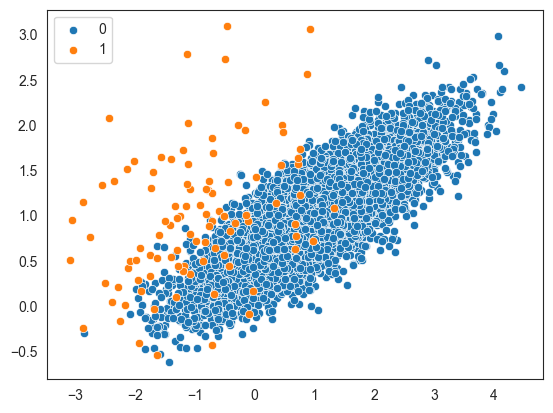

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


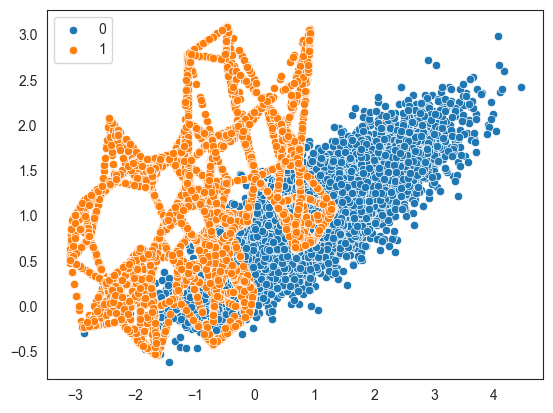

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


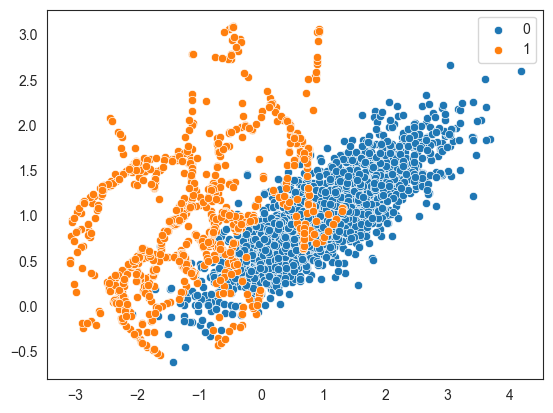

In [12]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

#--------------------------------------------------------------------------------------------------
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    sns.scatterplot(x=X[row_ix, 0], y=X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#--------------------------------------------------------------------------------------------------
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    sns.scatterplot(x=X[row_ix, 0], y=X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#--------------------------------------------------------------------------------------------------
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    sns.scatterplot(x=X[row_ix, 0], y=X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### Tuning SMOTE

In [13]:
%%time
# Hyper parameter tuning
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

parameters = {
'over__k_neighbors' : np.arange(1,5,1),
'over__sampling_strategy' : np.arange(0,1,.2),
'under__sampling_strategy' : np.arange(0,1,.2),
}

#--------------------------------------------------------------------------------------------------
X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')

logreg = Pipeline(steps=[('over', SMOTE(random_state=0)),
                         ('under', RandomUnderSampler()),
                         ("scaler", StandardScaler()),
                         ("mdl", LogisticRegression(penalty='none'))])

logreg_GS = GridSearchCV(estimator=logreg, param_grid=parameters, n_jobs=-1, cv=10,
                             scoring='accuracy',error_score=0, return_train_score = True,
                             verbose = 2)

logreg_GS.fit(X_train, y_train)

print('Model Best Params: ')
print(logreg_GS.best_params_)



Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Model Best Params: 
{'over__k_neighbors': 2, 'over__sampling_strategy': 0.2, 'under__sampling_strategy': 0.2}
CPU times: total: 2.91 s
Wall time: 14.1 s


C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\imblearn\pipeline.py", line 226, in _fit
    

In [14]:
%%time
# Hyper parameter tuning
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

parameters = {
'over__k_neighbors' : np.arange(1,5,1),
'over__sampling_strategy' : np.arange(0,1,.2),
}

#--------------------------------------------------------------------------------------------------
X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')

logreg = Pipeline(steps=[('over', SMOTE(random_state=0)),
                         ('under', RandomUnderSampler()),
                         ("scaler", StandardScaler()),
                         ("mdl", LogisticRegression(penalty='none'))])

logreg_GS = GridSearchCV(estimator=logreg, param_grid=parameters, n_jobs=-1, cv=10,
                             scoring='accuracy',error_score=0, return_train_score = True,
                             verbose = 2)

logreg_GS.fit(X_train, y_train)

print('Model Best Params: ')
print(logreg_GS.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Model Best Params: 
{'over__k_neighbors': 4, 'over__sampling_strategy': 0.8}
CPU times: total: 750 ms
Wall time: 2.06 s


C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\imblearn\pipeline.py", line 226, in _fit
    X, 

# Comparing Performance wtih SMOTE

In [15]:
%%time
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
logreg = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", LogisticRegression(penalty='none'))])

logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_train)[:, 1]
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
average_precision = average_precision_score(y_train, y_pred_proba)
print('ROC AUC Base: ',roc_auc_score(y_train, y_pred_proba))
print(f'PRAUC Base:    {average_precision}')
print('\n')

#--------------------------------------------------------------------------------------------------

logreg = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                         ("mdl", LogisticRegression(penalty='none'))])

logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_train)[:, 1]
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
average_precision = average_precision_score(y_train, y_pred_proba)
print('ROC AUC Base: ',roc_auc_score(y_train, y_pred_proba))
print(f'PRAUC SMOTE:   {average_precision}')
print('\n')

#--------------------------------------------------------------------------------------------------

logreg = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ('under', RandomUnderSampler(sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                         ("mdl", LogisticRegression(penalty='none'))])

logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_train)[:, 1]
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
average_precision = average_precision_score(y_train, y_pred_proba)
print('ROC AUC Base: ',roc_auc_score(y_train, y_pred_proba))
print(f'PRAUC SMOTE + Random: {average_precision}')
print('\n')

ROC AUC Base:  0.8233565892346592
PRAUC Base:    0.3149773340151215


ROC AUC Base:  0.8217230801720554
PRAUC SMOTE:   0.3123040625538241


ROC AUC Base:  0.8217563000634143
PRAUC SMOTE + Random: 0.31245932925480807


CPU times: total: 156 ms
Wall time: 137 ms


We decided to just use SMOTE as the question has said. The thing is that SMOTE reduces the AUC scores for both ROC and PR AUC.

We also took a look at using undersampling in addition to the SMOTE, however there is the problem that it reduces the total amount of data that we have to work with, which might affect performance. As we can see here from roughly looking at the ROC AUC and the PRAUC, the scores are slightly lower. 

 <br>

# Choice of Performance Metric<a id="section5"></a>

- **TP**: Correctly detecting a popular song [Highest Significance]
- **FP**: Wrongly detected a popular song [High Significance]
- **FN**: Fail to detect a popular song [Moderate Significance]
- **TN**: Correctly detecting an unpopular song [Low Significance]


Performance metric should prioritise maximising TP and minimising FP. If possible, FN should be minimised as well. 

Based on the above classfication of significance, the **Precision score (TP/TP+FP)** should be as high as possible, correctly **predicting more positives** and **falsely predicting less positives**. 

However, we should not only use Precision as the evaluation metric as FNs should are of moderate significance. In order to **minimise FNs, the Recall score should be as higher as possible**.

In order to maximise Recall and Precision, **Precision-Recall Area Under Curve (PR AUC)** should be the main evaluation metric.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

https://glassboxmedicine.com/2019/03/02/measuring-performance-auprcz


 <br>

# Logistic Regression 

The Training Accuracy is:  0.8705970149253731
The Testing Accuracy is:  0.8606060606060606
               precision    recall  f1-score   support

 Bad Response       0.99      0.57      0.72      2841
Good Response       0.27      0.98      0.42       459

     accuracy                           0.63      3300
    macro avg       0.63      0.77      0.57      3300
 weighted avg       0.89      0.63      0.68      3300



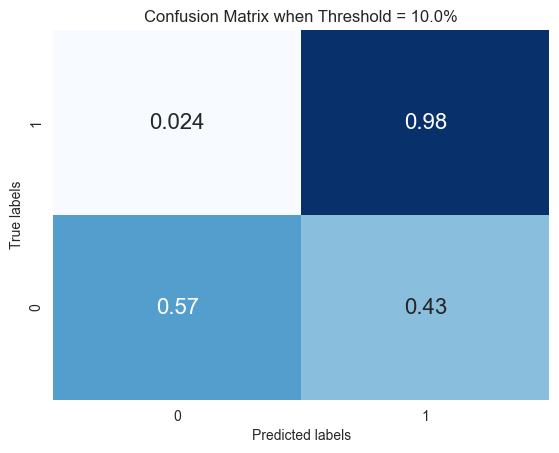

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


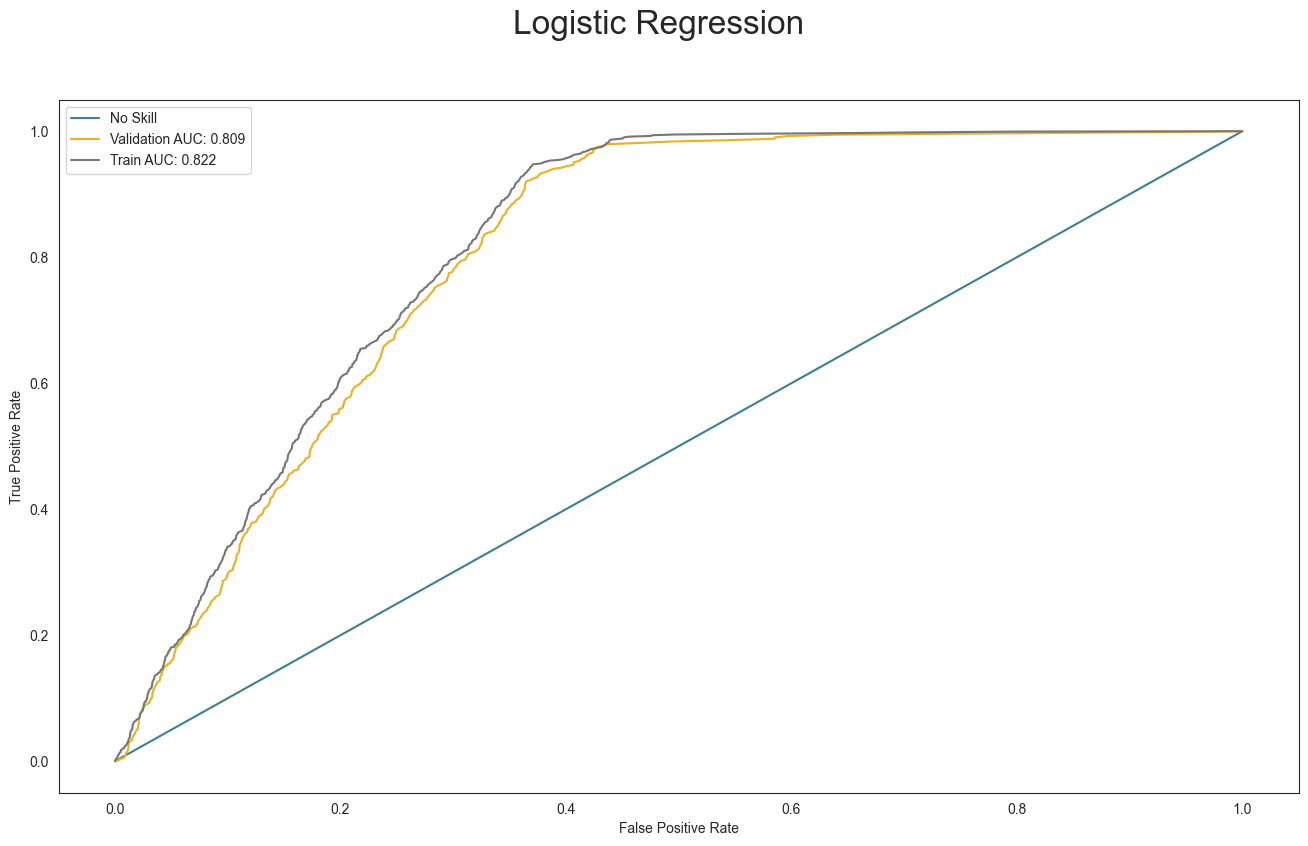

CPU times: total: 1.19 s
Wall time: 1.18 s


In [16]:
%%time
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
logreg = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                         ("mdl", LogisticRegression(penalty='none'))])

logreg.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, logreg, 'Logistic Regression')

### PRAUC

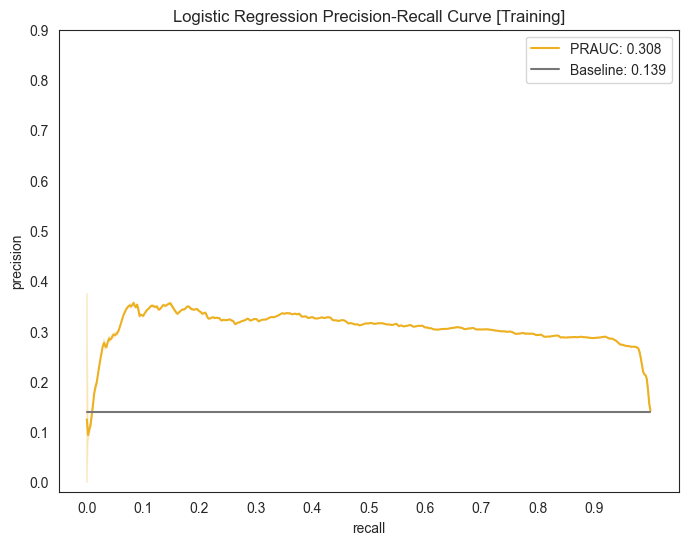

In [17]:
PRAUC_generator(X_train, y_train, X_val, y_val, logreg, 'Logistic Regression')

### Feature importance

,features,values
2,VehicleDamage,2.093188
4,Vintage,0.003238
3,Premium,-0.011734
0,Gender,-0.051047
1,Age,-0.304690
7,Age.1_> 2 Years,-3.342560
17,Region_Code_50,-3.412169
10,Region_Code_11,-3.693857
8,Region_Code_3,-3.780120
13,Region_Code_29,-3.955989


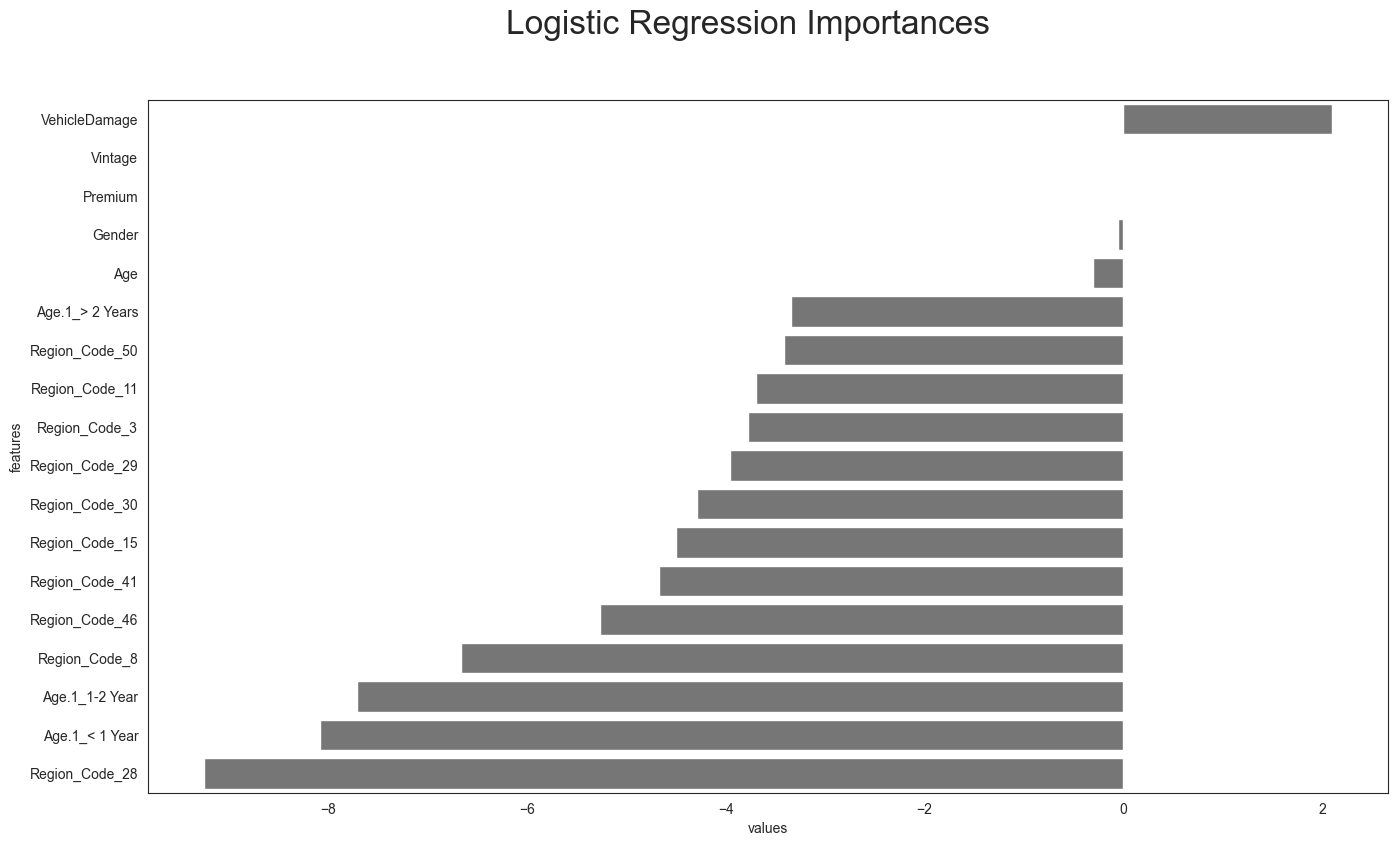

In [19]:
feature_selection_results(X_train, logreg, 'Logistic Regression')

<br>

<br>

# Choosing a Complex Model

In [20]:
%%time
results = []
names = []

#--------------------------------------------------------------------------------------------------

temp = []
models = []
models.append(('Logistic', LogisticRegression()))

models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

models.append(('K Neigbor Classifier', KNeighborsClassifier()))

models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))

models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))

models.append(('Ada boost', AdaBoostClassifier()))
models.append(('Gradient boosting', GradientBoostingClassifier()))

models.append(('Bagging classifier', BaggingClassifier()))

#--------------------------------------------------------------------------------------------------
# VOTING
logistic = LogisticRegression()
svc = SVC()
svm = SVC(kernel = 'rbf')
mlp = MLPClassifier(alpha=1, max_iter=1000)

list_models = [('logistic', logistic),
               ('svc', svc), 
               ('svm', svm),
               ('mlp', mlp)
              ]
models.append(('Voting regressor', VotingClassifier(estimators=list_models)))

for name, model in models:
    mdl = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                          ("mdl", model)])
    cv_results = cross_val_score(mdl, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)
    names.append(name)
    temp.append([name, abs(cv_results.mean()), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'Accuracy', 'Accuracy_std'])
mdl_performance = mdl_performance.sort_values('Accuracy', ascending=False)
mdl_performance

CPU times: total: 125 ms
Wall time: 8.37 s


,model,Accuracy,Accuracy_std
0,Logistic,0.870896,0.000149
4,Support Vector Classifier,0.870597,0.000149
5,Support Vector Machines,0.870597,0.000149
10,Voting regressor,0.870597,0.000149
6,MLP,0.869104,0.000746
8,Gradient boosting,0.865224,0.001940
7,Ada boost,0.860597,0.003881
1,Random Forest,0.851045,0.002090
3,K Neigbor Classifier,0.844030,0.002239
9,Bagging classifier,0.839104,0.000299


<br>

<br>

# Gradient Boost No Hyperparameter Tuning

The Training Accuracy is:  0.8759701492537313
The Testing Accuracy is:  0.8587878787878788
               precision    recall  f1-score   support

 Bad Response       0.99      0.60      0.75      2841
Good Response       0.28      0.96      0.43       459

     accuracy                           0.65      3300
    macro avg       0.63      0.78      0.59      3300
 weighted avg       0.89      0.65      0.70      3300



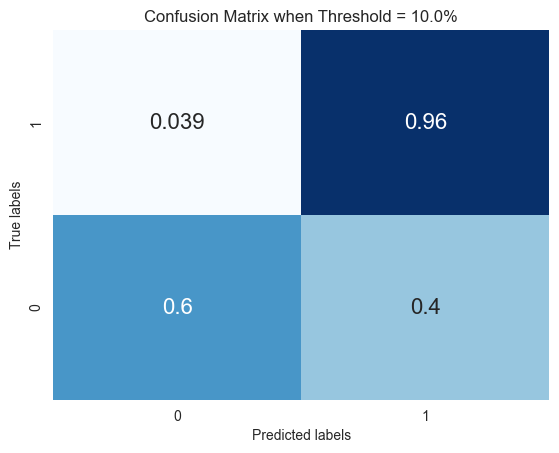

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


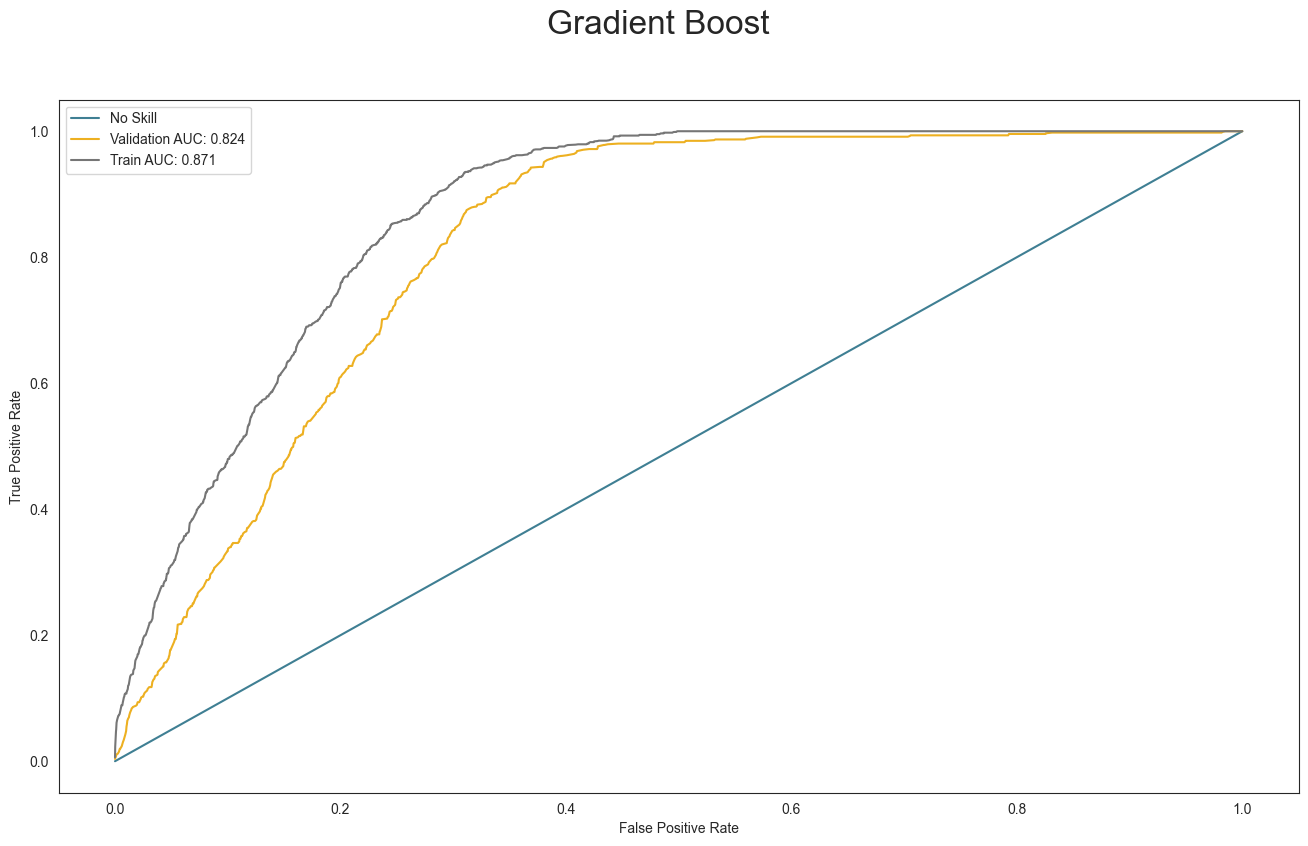

In [21]:
grad_boost = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier())])

grad_boost.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, grad_boost, 'Gradient Boost')

<br>

# Gradient Boost With Hyperparameter tuning 

In [46]:
%%time
# Hyper parameter tuning
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

parameters = {
    "mdl__n_estimators":[5,50,100,250],
    "mdl__max_depth":[1,3,5,7],
    "mdl__learning_rate":[0.01],
    'mdl__max_depth': [1,2,3,4,5],
}

#--------------------------------------------------------------------------------------------------

grad_boost = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier())])

grad_boost_GS = GridSearchCV(estimator=grad_boost, param_grid=parameters, n_jobs=-1, cv=10,
                             scoring='accuracy',error_score=0, return_train_score = True,
                             verbose = 2)

grad_boost_GS.fit(X_train, y_train)

print('Model Best Params: ')
print(grad_boost_GS.best_params_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Model Best Params: 
{'mdl__learning_rate': 0.01, 'mdl__max_depth': 4, 'mdl__n_estimators': 250}
CPU times: total: 3.16 s
Wall time: 26.5 s


In [47]:
# parameters to hyper tune
print('Gradient Boost Params: ')
grad_boost_GS.get_params()

Gradient Boost Params: 


{'cv': 10,
 'error_score': 0,
 'estimator__memory': None,
 'estimator__steps': [('over',
   SMOTE(k_neighbors=2, random_state=0, sampling_strategy=0.2)),
  ('scaler', StandardScaler()),
  ('mdl', GradientBoostingClassifier())],
 'estimator__verbose': False,
 'estimator__over': SMOTE(k_neighbors=2, random_state=0, sampling_strategy=0.2),
 'estimator__scaler': StandardScaler(),
 'estimator__mdl': GradientBoostingClassifier(),
 'estimator__over__k_neighbors': 2,
 'estimator__over__n_jobs': None,
 'estimator__over__random_state': 0,
 'estimator__over__sampling_strategy': 0.2,
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__mdl__ccp_alpha': 0.0,
 'estimator__mdl__criterion': 'friedman_mse',
 'estimator__mdl__init': None,
 'estimator__mdl__learning_rate': 0.1,
 'estimator__mdl__loss': 'log_loss',
 'estimator__mdl__max_depth': 3,
 'estimator__mdl__max_features': None,
 'estimator__mdl__max_leaf_nodes': None,
 'estimat

The Training Accuracy is:  0.871044776119403
The Testing Accuracy is:  0.860909090909091
               precision    recall  f1-score   support

 Bad Response       0.99      0.58      0.73      2841
Good Response       0.27      0.97      0.42       459

     accuracy                           0.63      3300
    macro avg       0.63      0.77      0.58      3300
 weighted avg       0.89      0.63      0.69      3300



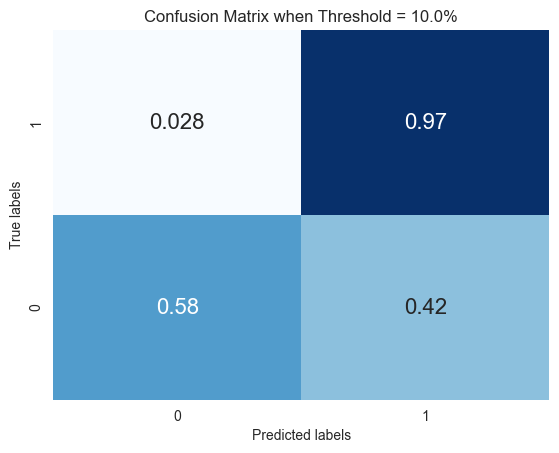

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


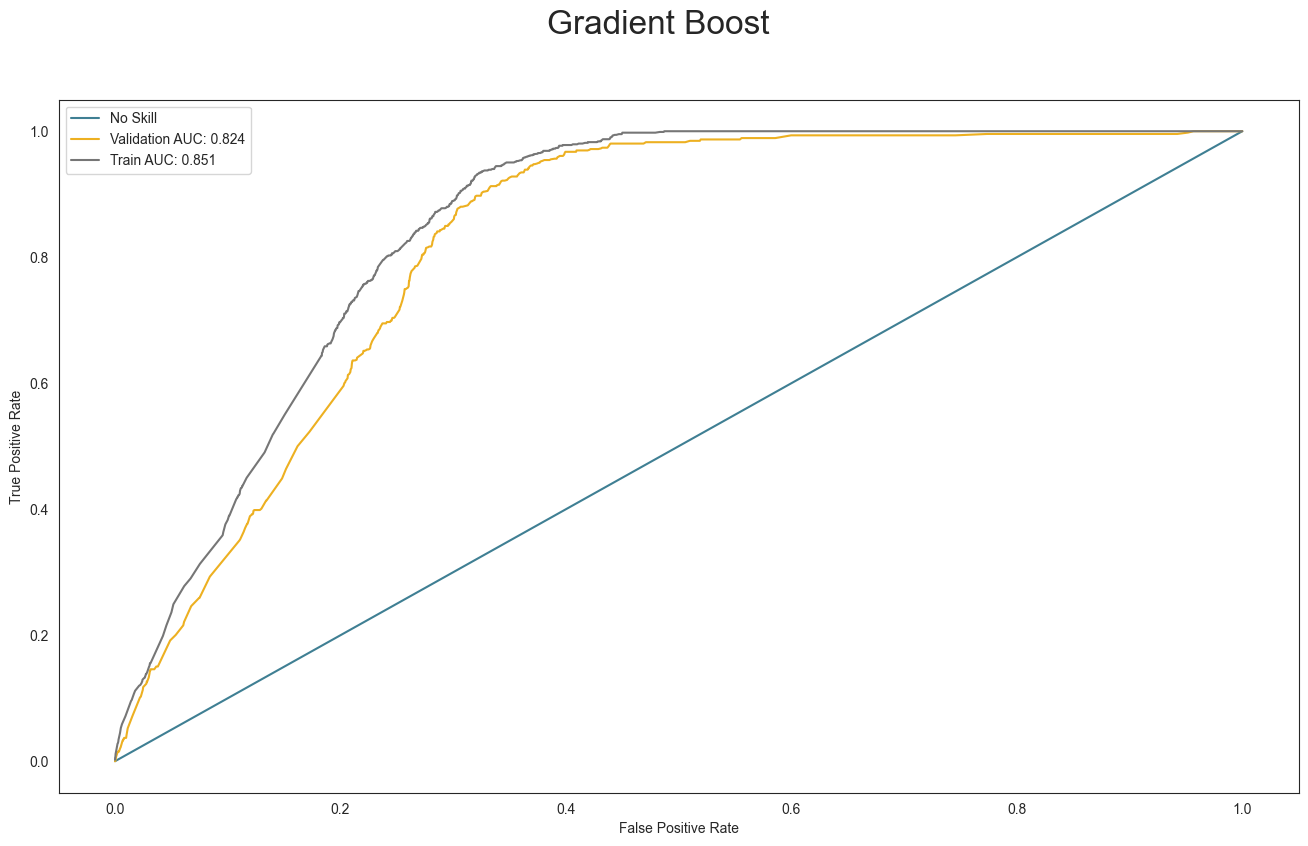

In [48]:
classification_stats(X_train, y_train, X_val, y_val, grad_boost_GS, 'Gradient Boost')

### PRAUC

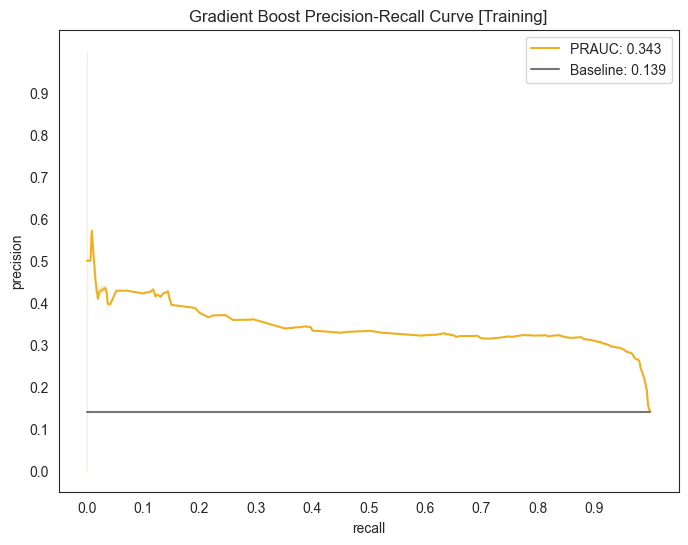

In [49]:
PRAUC_generator(X_train, y_train, X_val, y_val, grad_boost_GS, 'Gradient Boost')

### Feature Importance 

,features,values
2,VehicleDamage,0.611482
1,Age,0.140804
7,Age.1_> 2 Years,0.089025
5,Age.1_1-2 Year,0.039410
6,Age.1_< 1 Year,0.020707
9,Region_Code_8,0.020118
4,Vintage,0.015158
3,Premium,0.012806
16,Region_Code_46,0.012680
12,Region_Code_28,0.012396


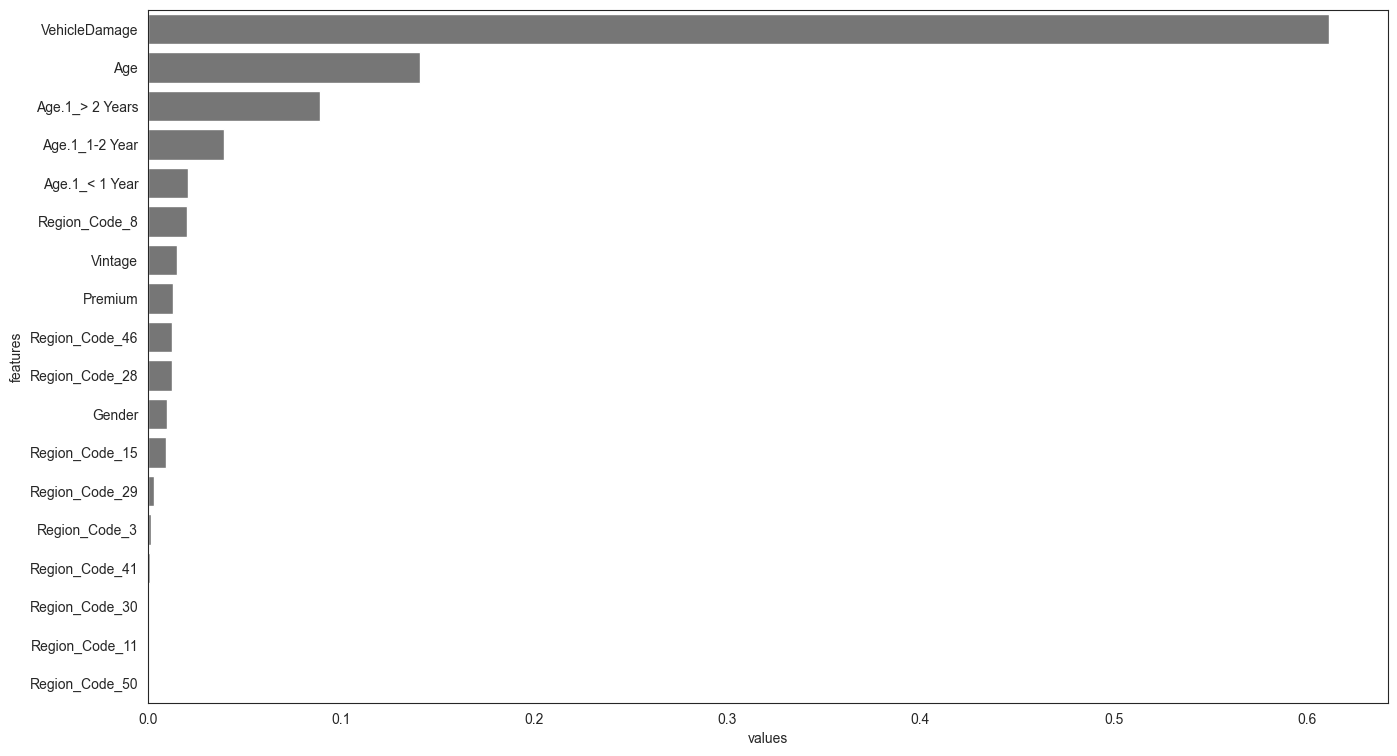

In [50]:
importance = grad_boost_GS.best_estimator_.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.show()

<br>

# Averaging both Models 

In [51]:
logreg_pred = logreg.predict(X_val)
grad_boost_pred = grad_boost_GS.predict(X_val)

ave = np.mean( np.array([ logreg_pred, grad_boost_pred ]), axis=0 )

The Training Accuracy is:  0.8516417910447761
The Testing Accuracy is:  0.8348484848484848
               precision    recall  f1-score   support

 Bad Response       0.99      0.58      0.73      2841
Good Response       0.27      0.97      0.42       459

     accuracy                           0.63      3300
    macro avg       0.63      0.77      0.58      3300
 weighted avg       0.89      0.63      0.69      3300



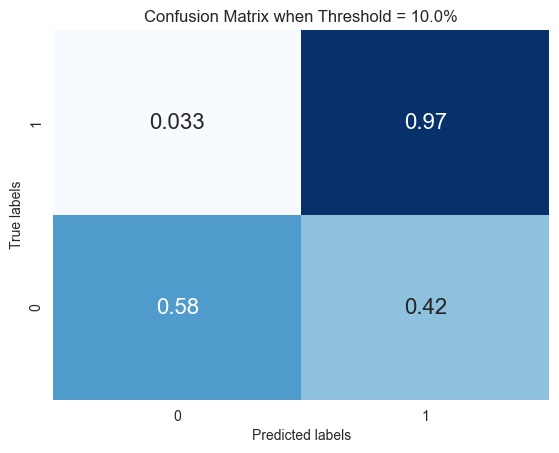

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


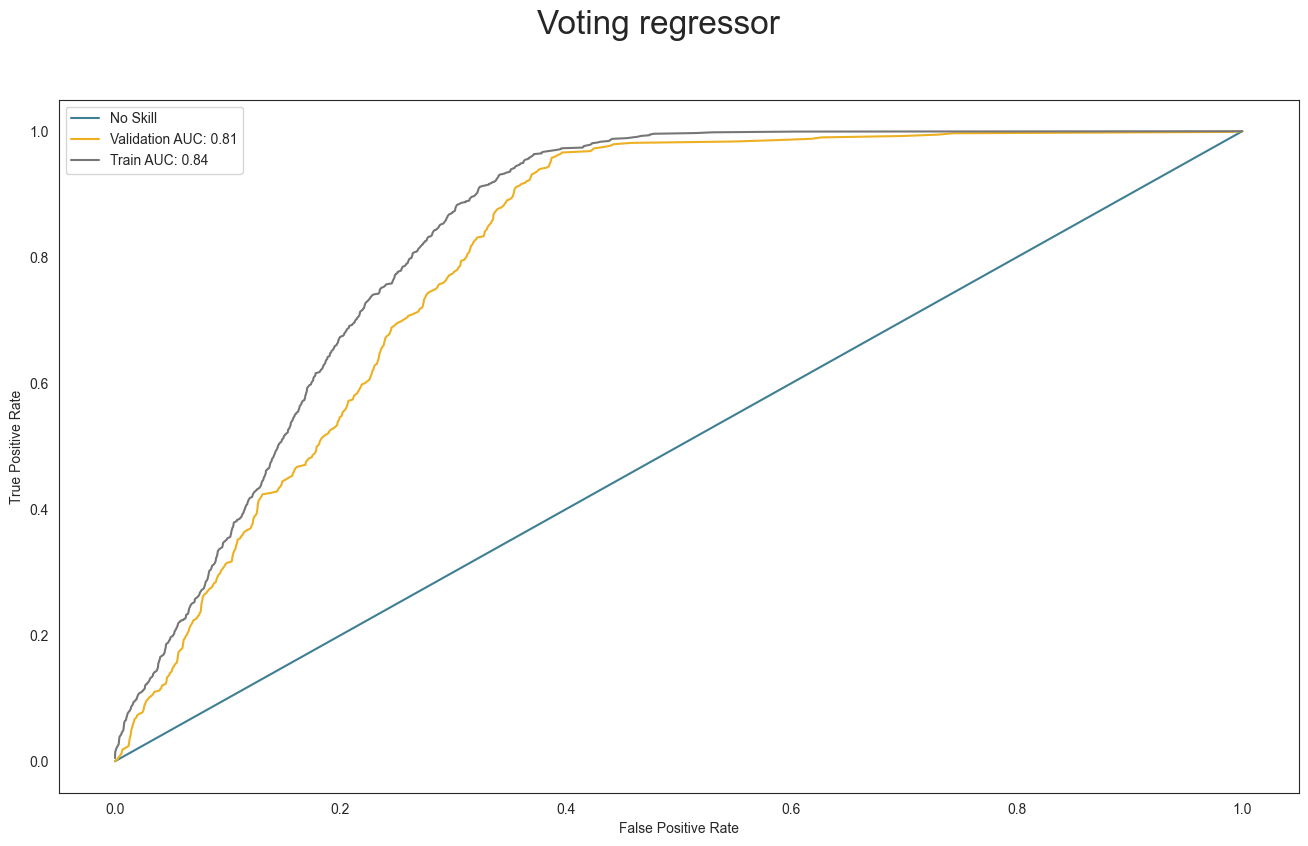

In [55]:
list_models = [('logistic', logreg),
               ('grad boost', grad_boost), 
              ]
 
voting = VotingClassifier(estimators=list_models, voting='soft').fit(X_train, y_train)
    
classification_stats(X_train, y_train, X_val, y_val, voting, 'Voting regressor')

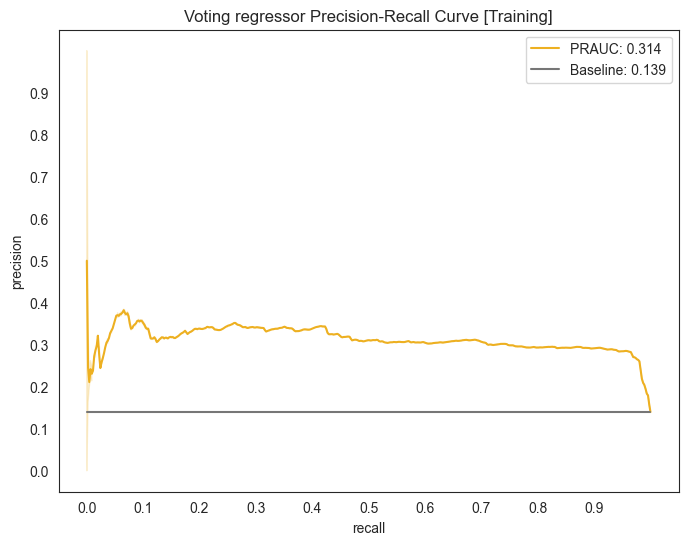

In [56]:
PRAUC_generator(X_train, y_train, X_val, y_val, voting, 'Voting regressor')

<br>

<br>

# Part 2: Mystery

### One Hot

In [27]:
train2_df = train_df_raw.copy()

# Make male = 1 female = 0 
train2_df['Gender'] = train2_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train2_df['VehicleDamage'] = train2_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train2_df = pd.get_dummies(train2_df, columns=['Age.1'])
train2_df = pd.get_dummies(train2_df, columns=['Region_Code'])
train2_df = pd.get_dummies(train2_df, columns=['Mystery'])

# Drop mystery 
train2_df = train2_df.drop('Unnamed: 0', axis=1)

train2_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,...,Mystery_M19,Mystery_M2,Mystery_M20,Mystery_M3,Mystery_M4,Mystery_M5,Mystery_M6,Mystery_M7,Mystery_M8,Mystery_M9
0,319654,1,22,1,29719,79,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,298528,0,40,1,29645,99,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,120858,1,25,1,35996,266,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,234326,0,25,0,56899,25,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,372307,0,70,0,47452,189,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9996,366284,1,43,1,28945,66,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9997,369037,0,46,0,2630,286,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.8518181818181818
               precision    recall  f1-score   support

 Bad Response       0.98      0.61      0.75      2841
Good Response       0.28      0.93      0.43       459

     accuracy                           0.66      3300
    macro avg       0.63      0.77      0.59      3300
 weighted avg       0.88      0.66      0.71      3300



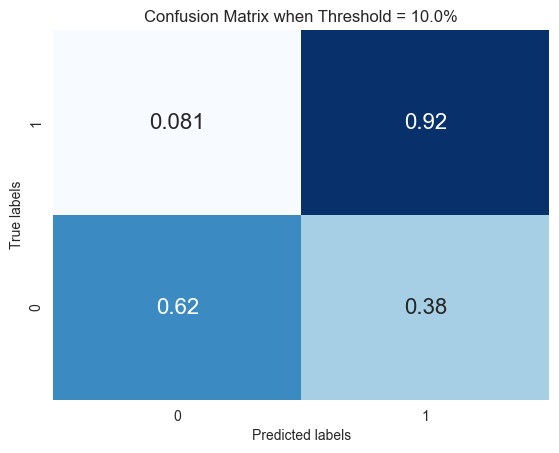

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


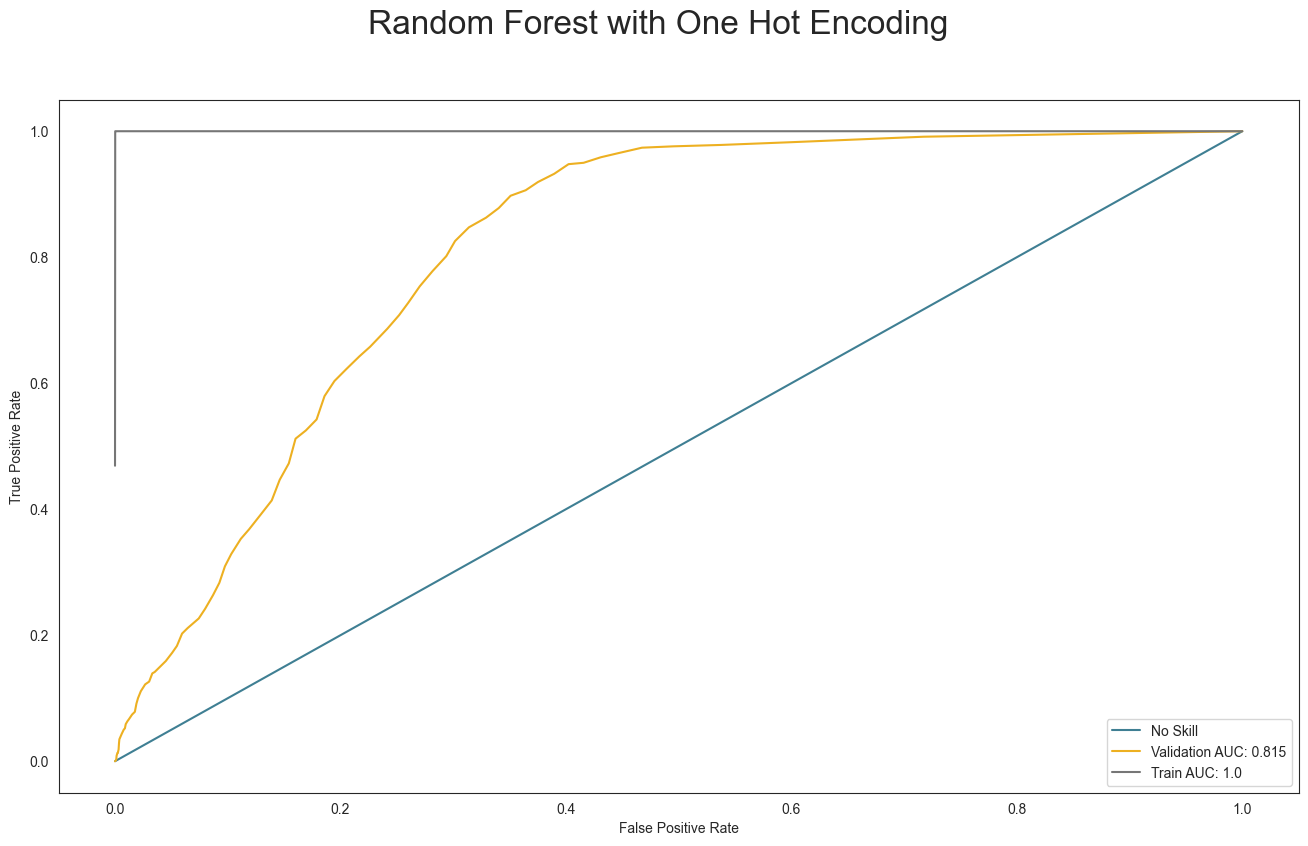

In [28]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response',
            'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years','Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28',
            'Region_Code_29', 'Region_Code_30', 'Region_Code_41', 'Region_Code_46',
            'Region_Code_50', 'Mystery_M1', 'Mystery_M10', 'Mystery_M11', 'Mystery_M12',
            'Mystery_M13', 'Mystery_M14', 'Mystery_M15', 'Mystery_M16', 'Mystery_M17',
            'Mystery_M18', 'Mystery_M19', 'Mystery_M2', 'Mystery_M20', 'Mystery_M3',
            'Mystery_M4','Mystery_M5', 'Mystery_M6', 'Mystery_M7', 'Mystery_M8', 'Mystery_M9']

X_train, X_val, y_train, y_val = data_generation(train2_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
random_forest_one_hot = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

random_forest_one_hot.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, random_forest_one_hot, 'Random Forest with One Hot Encoding')

,features,values
1,Age,0.179266
4,Vintage,0.174858
3,Premium,0.167087
2,VehicleDamage,0.124522
6,Age.1_< 1 Year,0.037224
5,Age.1_1-2 Year,0.023101
0,Gender,0.022810
7,Age.1_> 2 Years,0.017769
12,Region_Code_28,0.016393
9,Region_Code_8,0.010598


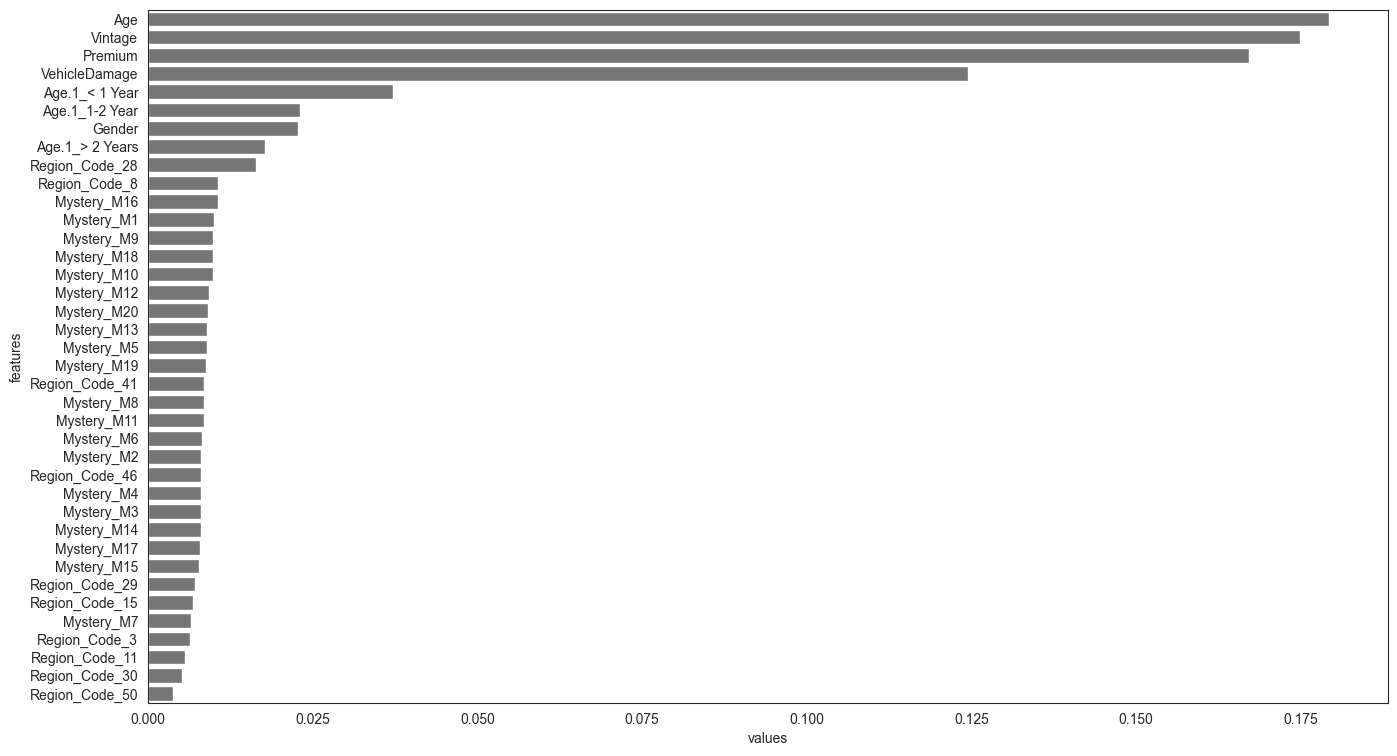

In [29]:
importance = random_forest_one_hot.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.show()

<br>

### Integer Encoding

In [30]:
train3_df = train_df_raw.copy()

# Make male = 1 female = 0 
train3_df['Gender'] = train3_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train3_df['VehicleDamage'] = train3_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train3_df = pd.get_dummies(train3_df, columns=['Age.1'])
train3_df = pd.get_dummies(train3_df, columns=['Region_Code'])
train3_df['Mystery'] = train3_df['Mystery'].apply(lambda x: int(x[1:]))

# Drop mystery 
train3_df = train3_df.drop('Unnamed: 0', axis=1)

train3_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Mystery,Age.1_1-2 Year,Age.1_< 1 Year,...,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,319654,1,22,1,29719,79,0,3,0,1,...,0,0,0,0,0,0,0,0,1,0
1,298528,0,40,1,29645,99,0,20,1,0,...,0,0,0,0,1,0,0,0,0,0
2,120858,1,25,1,35996,266,1,3,1,0,...,0,0,0,0,1,0,0,0,0,0
3,234326,0,25,0,56899,25,0,20,0,1,...,0,0,0,0,0,1,0,0,0,0
4,372307,0,70,0,47452,189,0,17,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,3,0,1,...,0,0,0,0,0,0,0,1,0,0
9996,366284,1,43,1,28945,66,0,13,0,0,...,0,0,0,0,0,0,0,0,1,0
9997,369037,0,46,0,2630,286,0,4,1,0,...,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,16,0,1,...,0,0,0,0,0,0,1,0,0,0


In [31]:
train3_df.columns

Index(['id', 'Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
       'Response', 'Mystery', 'Age.1_1-2 Year', 'Age.1_< 1 Year',
       'Age.1_> 2 Years', 'Region_Code_3', 'Region_Code_8', 'Region_Code_11',
       'Region_Code_15', 'Region_Code_28', 'Region_Code_29', 'Region_Code_30',
       'Region_Code_41', 'Region_Code_46', 'Region_Code_50'],
      dtype='object')

The Training Accuracy is:  1.0
The Testing Accuracy is:  0.8503030303030303
               precision    recall  f1-score   support

 Bad Response       0.98      0.61      0.76      2841
Good Response       0.28      0.92      0.43       459

     accuracy                           0.66      3300
    macro avg       0.63      0.77      0.59      3300
 weighted avg       0.88      0.66      0.71      3300



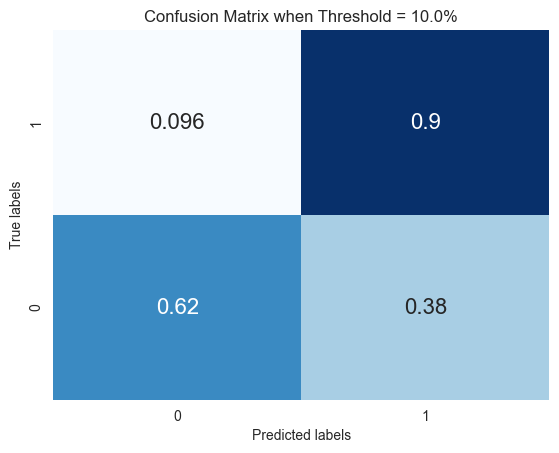

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


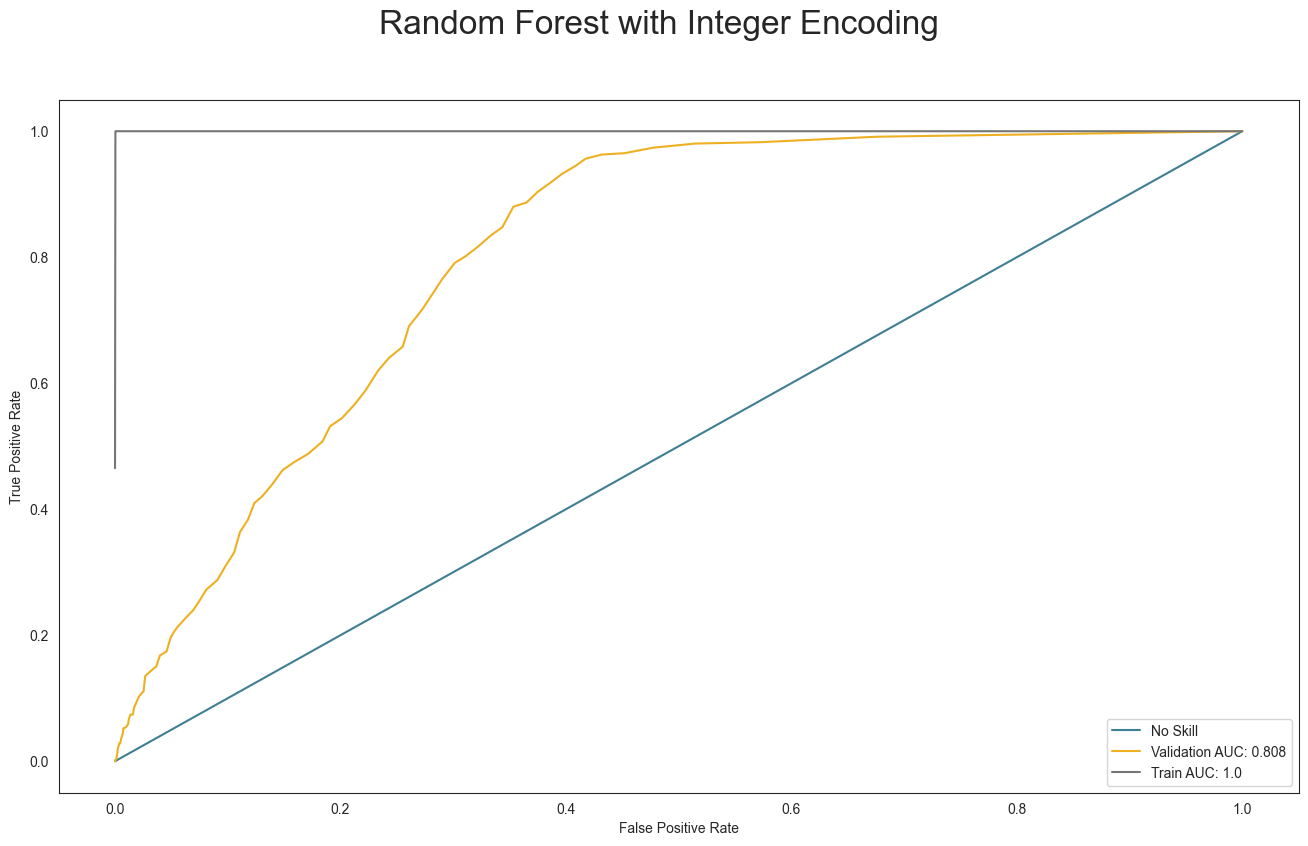

In [32]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Mystery', 'Age.1_1-2 Year', 'Age.1_< 1 Year',
            'Age.1_> 2 Years', 'Region_Code_3', 'Region_Code_8', 'Region_Code_11',
            'Region_Code_15', 'Region_Code_28', 'Region_Code_29', 'Region_Code_30',
            'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train3_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
random_forest_integer = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

random_forest_integer.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, random_forest_integer, 'Random Forest with Integer Encoding')

,features,values
4,Vintage,0.195394
1,Age,0.194146
3,Premium,0.184288
5,Mystery,0.131526
2,VehicleDamage,0.126355
7,Age.1_< 1 Year,0.035266
6,Age.1_1-2 Year,0.021674
0,Gender,0.019439
13,Region_Code_28,0.017683
8,Age.1_> 2 Years,0.015047


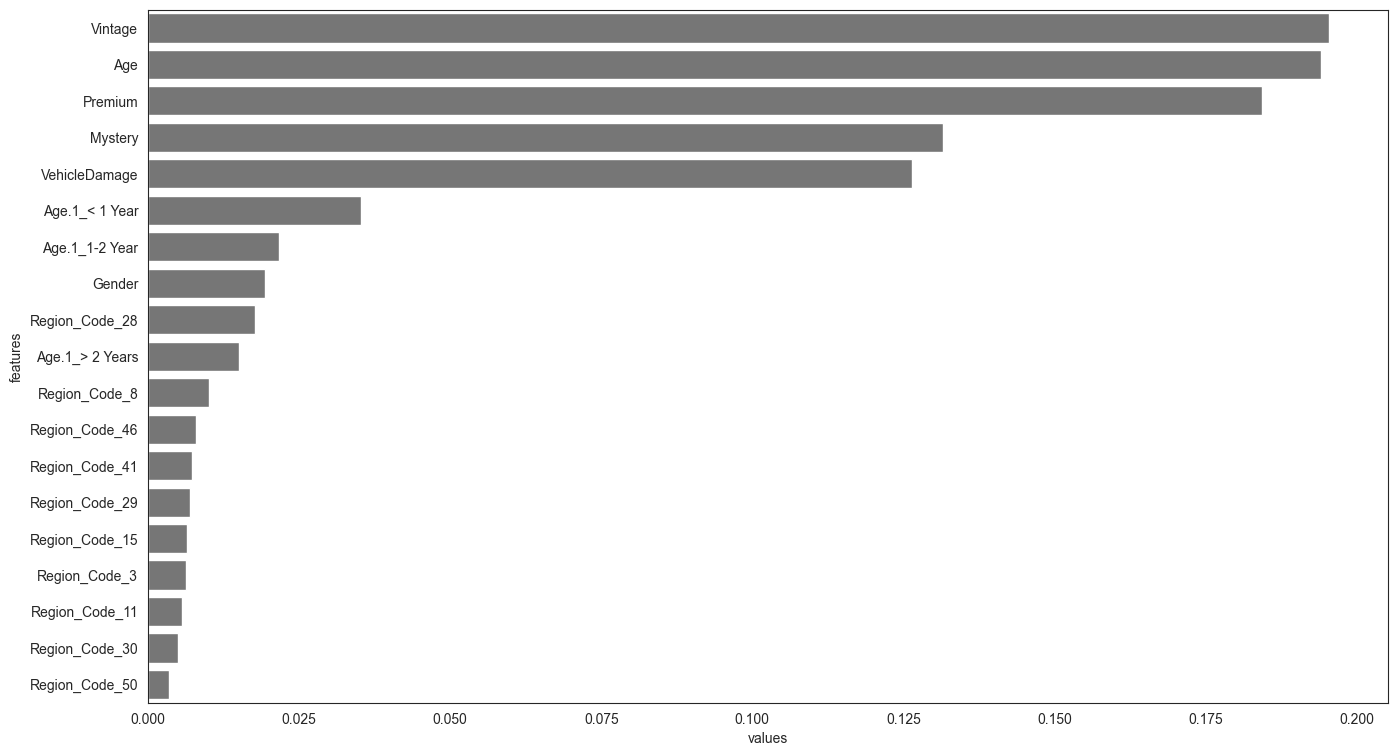

In [33]:
importance = random_forest_integer.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.show()

<br>

<br>

# Benefit Structure 

In [34]:
def findProbabilityThreshold(tp, fp, fn, tn, model, thresholds, X_train, y_train, X_test, y_test):
    confusion_matrices = []

    for i in range(0, len(thresholds)):
        threshold = thresholds[i]
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred = (y_pred_proba > threshold).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)
    
    benefits = []

    for j in range(0, len(thresholds)):
        cm = confusion_matrices[j]
        t_neg = cm[0, 0]
        f_pos = cm[0, 1]
        f_neg = cm[1, 0]
        t_pos = cm[1, 1]
        total = t_neg + f_pos + f_neg + t_pos

        cost_of_tp = tp
        cost_of_fn = fn
        cost_of_fp = fp
        cost_of_tn = tn

        benefit = (t_pos * cost_of_tp
                   + f_neg * cost_of_fn
                   + f_pos * cost_of_fp
                   + (t_pos + f_pos) * cost_of_tn)
        benefits.append(benefit)

    print("Probability Thresholds: ")
    print(thresholds)
    print("Benefits for each probability threshold: ")
    print(benefits)
    
    print("\nBest Probability Threshold & Benefit for " + type(model).__name__ + ":")

    print("Probability Threshold: " + str(thresholds[np.argmax(benefits)] * 100) + "%")
    print("Benefit: " + str(np.max(benefits)))
    
    return thresholds[np.argmax(benefits)]

### Part 1: 
- Promote to an interested customer + 10
- Miss an interested customer - 10
- Promote to an uninterested customer - 2
- Each promotion - 1


In this case we are focusing on **TP** (promote to interested customer) and **FN** (miss an interested customer). We also dont really case as much about promoting to an uninterested customer **(FP)** and the costs of each promotion **(TN)**. 

Probability Thresholds: 
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Benefits for each probability threshold: 
[-4392, 78, 198, 198, 198, 198, 198, 198, 201, 225, 250, 250, 205, 245, 302, 303, 310, 218, 122, -26, -206, -287, -450, -580, -747, -995, -1195, -1299, -1421, -1547, -1807, -1926, -2153, -2420, -2913, -3213, -3471, -3696, -4008, -4107, -4324, -4399, -4518, -4592, -4603, -4607, -4611, -4602, -4599, -4599, -4593, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590,

(0.0, 2.0)

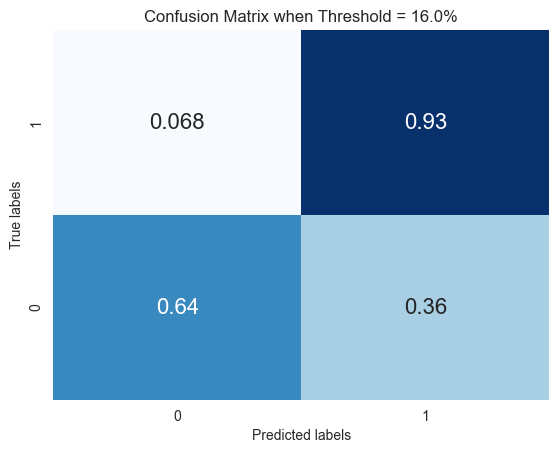

In [35]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')
#--------------------------------------------------------------------------------------------------

thresholds = np.arange(0.0, 1.0, 0.01)

best_threshold = findProbabilityThreshold(10, -2, -10, -1,
                                          logreg,
                                          thresholds, 
                                          X_train, y_train,
                                         X_val, y_val)

y_pred_proba = logreg.predict_proba(X_train)[:,1]
y_pred = (y_pred_proba > best_threshold).astype(int)
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)

fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix when Threshold = ' + str(best_threshold*100) + '%')
fig.set_ylim([0,2])

### Part 2:
- Promote to an interested customer + 100
- Miss an interested customer - 100
- Promote to an uninterested customer - 2
- Each promotion - 1


In this case we are very focused on **TP** (promote to interested customer) and **FN** (miss an interested customer). We also dont really care at all about promoting to an uninterested customer **(FP)** and the costs of each promotion **(TN)**. 

Probability Thresholds: 
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Benefits for each probability threshold: 
[36918, 39768, 39888, 39888, 39888, 39888, 39888, 39888, 39891, 39915, 39580, 39040, 37915, 37055, 36572, 35673, 35320, 33788, 32072, 29584, 26164, 23923, 20880, 17870, 14643, 10795, 7535, 5451, 3349, 1063, -2797, -5436, -9263, -13850, -20463, -25083, -29661, -33126, -37218, -38937, -41494, -42649, -44208, -45182, -45553, -45737, -45921, -45912, -45909, -45909, -45903, -45900, -45900, -45900, -45900, -45900, -45900, -459

(0.0, 2.0)

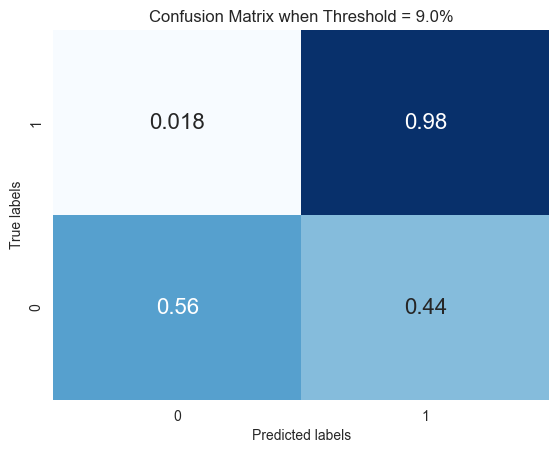

In [36]:
thresholds = np.arange(0.0, 1.0, 0.01)

best_threshold = findProbabilityThreshold(100, -2, -100, -1,
                                          logreg,
                                          thresholds,
                                          X_train, y_train,
                                         X_val, y_val)

y_pred_proba = logreg.predict_proba(X_train)[:,1]
y_pred = (y_pred_proba > best_threshold).astype(int)
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)

fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix when Threshold = ' + str(best_threshold*100) + '%')
fig.set_ylim([0,2])

## Taking a look at a bunch of thresholds 

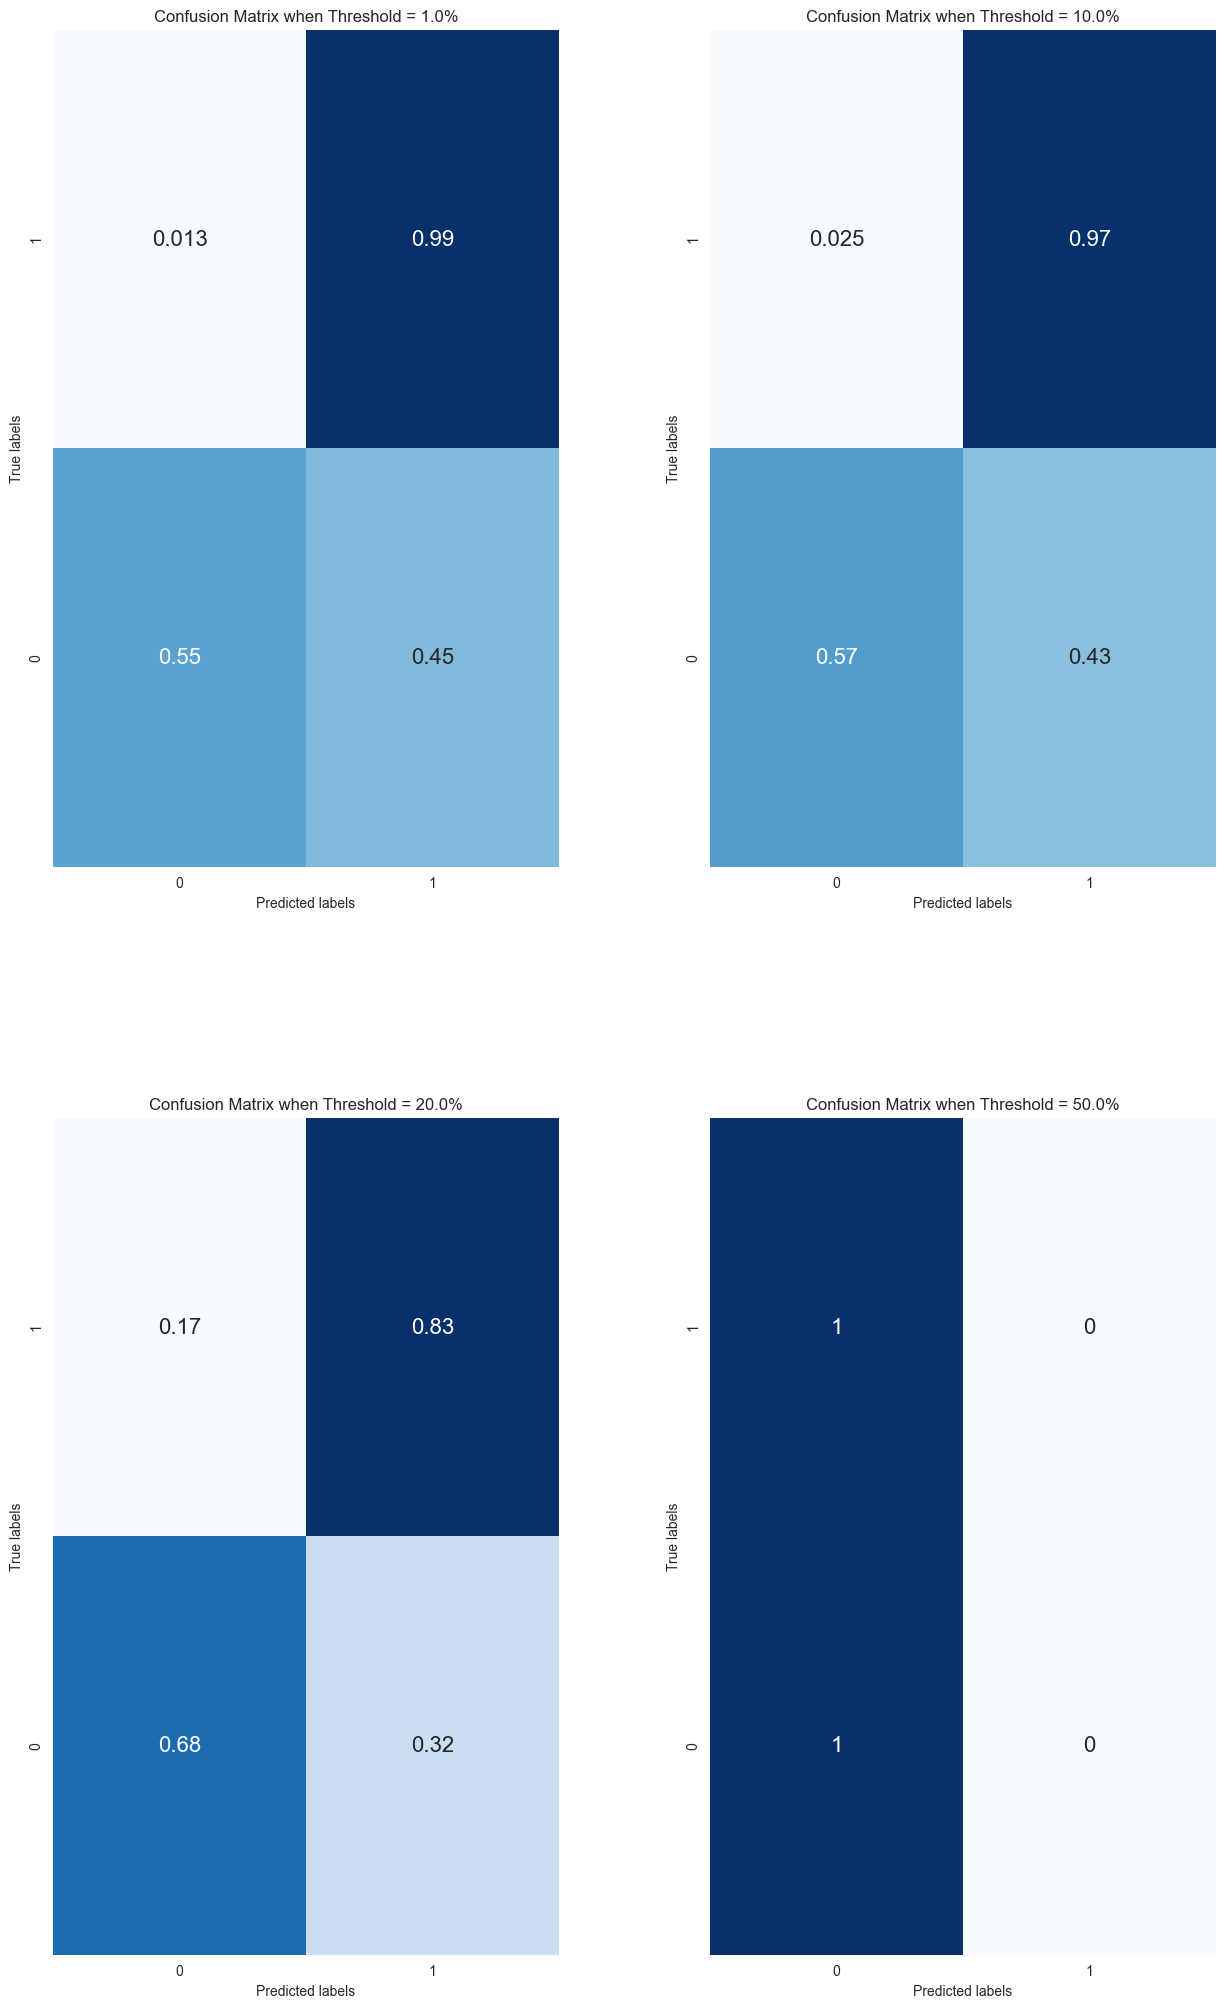

In [37]:
thresholds = [.01, .1, .2, .5]
confusion_matrices = []
fig, axes = plt.subplots(figsize=(15,25))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(1, 5):
    ax = plt.subplot(2, 2, i)
    threshold = thresholds[i-1]
    y_pred_proba = logreg.predict_proba(X_train)[:,1]
    y_pred = (y_pred_proba > threshold).astype(int)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)
    confusion_matrices.append(disp)

    sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix when Threshold = ' + str(threshold*100) + '%');
    ax.set_ylim([0,2])


plt.show()

<br>

<br>

# Using Test Set 

In [38]:
display(test_df.head())

y_test = test_df['Response']
X_test = test_df.drop('Response', axis=1)
X_test = X_test.drop('id', axis=1)


,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,121588,0,24,1,2630,271,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,44234,1,23,1,40523,244,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,65903,1,51,1,40951,33,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,264705,0,31,1,42505,191,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,364309,1,51,1,38232,151,1,1,0,0,0,0,0,0,0,0,0,0,1,0


# Logistic 

The Training Accuracy is:  0.8705970149253731
The Testing Accuracy is:  0.8635
               precision    recall  f1-score   support

 Bad Response       0.99      0.56      0.72      8636
Good Response       0.26      0.97      0.41      1364

     accuracy                           0.62     10000
    macro avg       0.63      0.77      0.56     10000
 weighted avg       0.89      0.62      0.67     10000



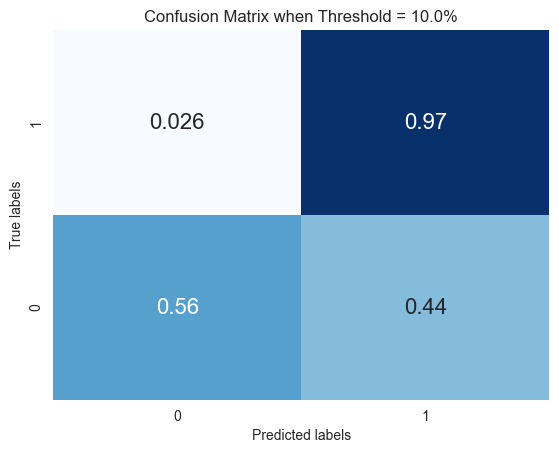

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


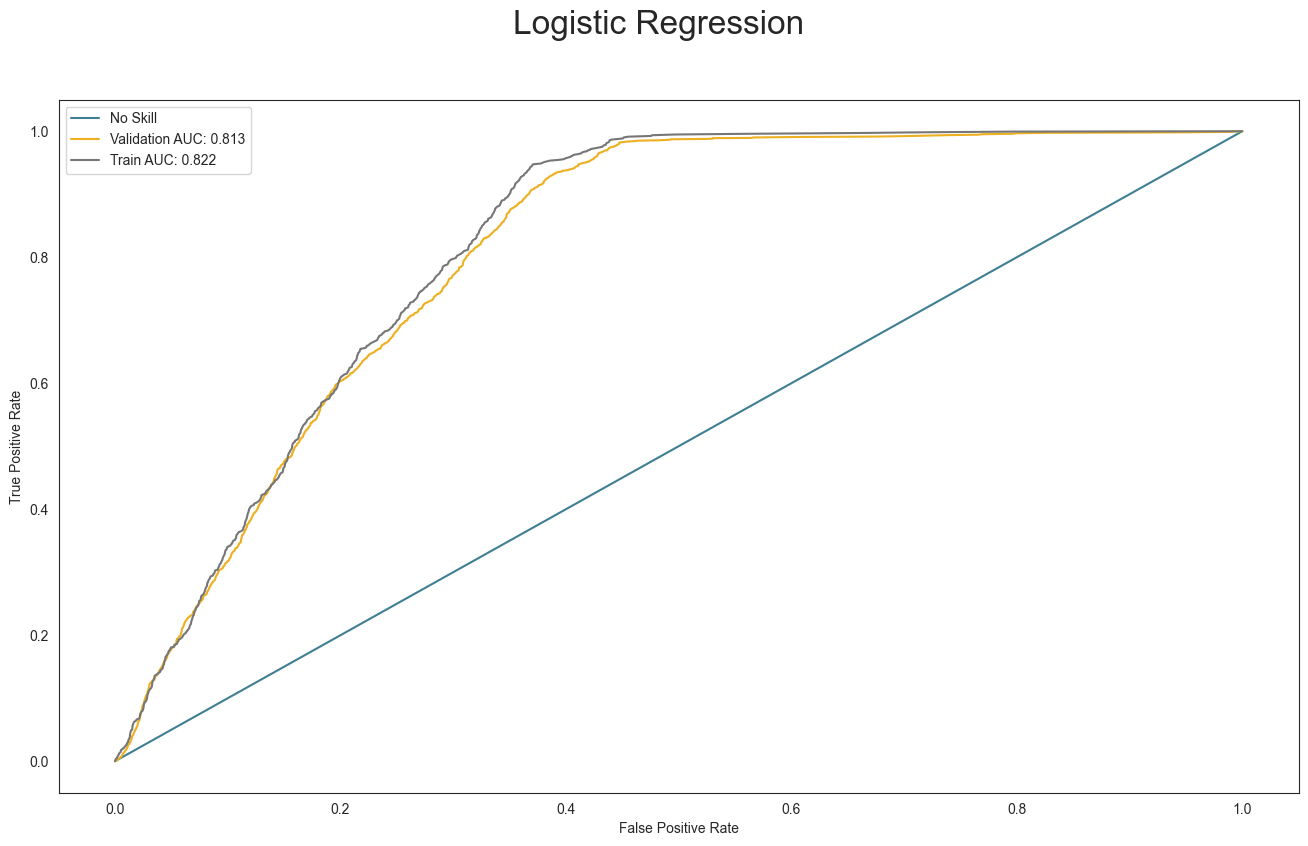

CPU times: total: 1.2 s
Wall time: 1.2 s


In [39]:
%%time
classification_stats(X_train, y_train, X_test, y_test, logreg, 'Logistic Regression')

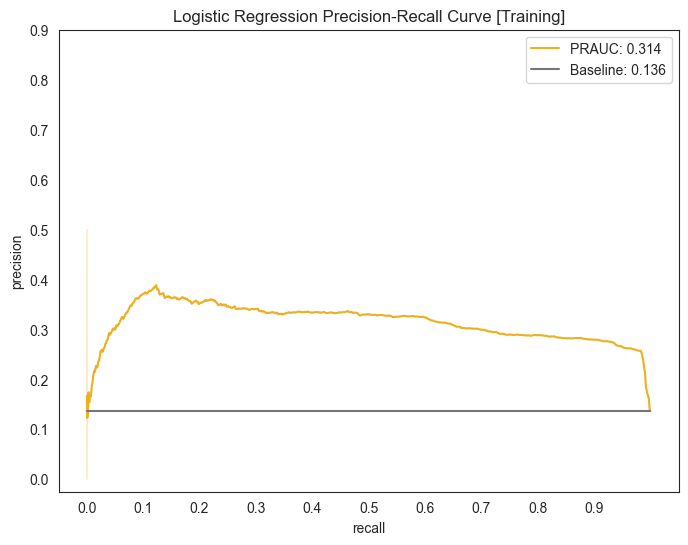

In [40]:
PRAUC_generator(X_train, y_train, X_test, y_test, logreg, 'Logistic Regression')